In [1]:
import numpy as np
from scipy import ndimage
import pylab as plt
%matplotlib inline
import sys
sys.path.insert(0, 'python')
from nicer_plot import *
from scipy import signal
import scipy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#plot_config()

In [3]:
def gaussian(xwin, ywin, xstd, ystd, angle, norm = True):
    win = max(xwin, ywin)
    winx = win*2**0.5
    winy = win*2**0.5
    
    xstd = xstd*2**0.5
    ystd = ystd*2**0.5
        
    xgaus = signal.gaussian(winx, xstd)
    ygaus = signal.gaussian(winy, ystd)
    gaus  = np.outer(xgaus, ygaus)
    r_gaus = scipy.ndimage.interpolation.rotate(gaus, angle, reshape=True)
    center = np.array(r_gaus.shape)/2
    cgaus = r_gaus[center[0]-xwin/2: center[0]+xwin/2, center[1]-ywin/2:center[1]+ywin/2]
    if norm:
        return cgaus/cgaus.sum()
    else:
        return cgaus

In [4]:
gaus = gaussian(150,150,20, 300,8)

In [5]:
gaus

array([[  1.10453364e-06,   1.12122068e-06,   1.13812611e-06, ...,
          7.28185912e-06,   7.35971410e-06,   7.43818087e-06],
       [  1.22516887e-06,   1.24346516e-06,   1.26199729e-06, ...,
          7.87607791e-06,   7.95892091e-06,   8.04239676e-06],
       [  1.35731472e-06,   1.37734819e-06,   1.39763593e-06, ...,
          8.50834976e-06,   8.59636871e-06,   8.68504064e-06],
       ..., 
       [  8.86123992e-06,   8.77116715e-06,   8.68175250e-06, ...,
          1.43553832e-06,   1.41476459e-06,   1.39425015e-06],
       [  8.20821466e-06,   8.12338643e-06,   8.03919645e-06, ...,
          1.29664093e-06,   1.27765803e-06,   1.25891575e-06],
       [  7.59399866e-06,   7.51422922e-06,   7.43507720e-06, ...,
          1.16974787e-06,   1.15242503e-06,   1.13532508e-06]])

In [52]:
a = np.zeros((300,300))
a[53:203, 130:280]=gaus

In [53]:
gaus.shape

(150, 150)

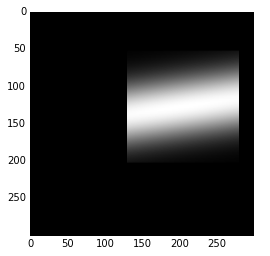

In [54]:
plt.imshow(a, cmap = cm.gray)

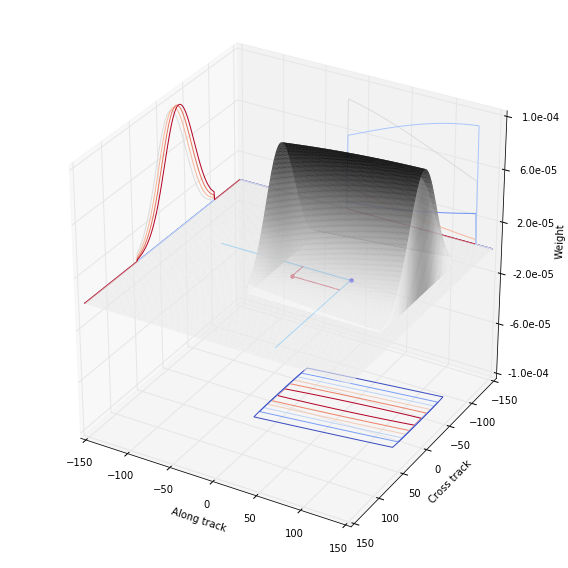

In [66]:
X = np.arange(-150, 150)
Y = np.arange(-150, 150)
X, Y = np.meshgrid(X, Y)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(X, Y, a, rstride=1, cstride=1,linewidth=0.01, alpha=0.8, cmap = cm.Greys)
cset = ax.contour(X, Y, a, zdir='z', offset=-0.0001, cmap=cm.coolwarm)
cset = ax.contour(X, Y, a, zdir='x', offset=-150, cmap=cm.coolwarm)
cset = ax.contour(X, Y, a, zdir='y', offset=-150, cmap=cm.coolwarm)
ax.scatter(55,-22,0, 'o', lw=0)
ax.scatter(0,0,0, 'o', lw=0, facecolor='#b80024')
ax.plot(np.arange(-95,55), [-22 for i in range(150)], np.zeros(150), color='#40b5ff')
ax.plot([55 for i in range(150)], range(-22,128), np.zeros(150),color='#40b5ff')

ax.plot(np.zeros(22), range(-22,0), np.zeros(22), color='#b80024')
ax.plot(range(55), np.zeros(55), np.zeros(55), color= '#b80024')
#ax.plot([55 for i in range(10)],[-22 for i in range(10)], np.linspace(0,0.0001, 10),color='#40b5ff')
ax.set_xlabel('Along track')
ax.set_xlim(-150, 150)
ax.set_ylabel('Cross track')
ax.set_ylim(150, -150)
ax.set_zlabel('Weight')
ax.set_zlim(-0.0001, 0.0001)
ax.zaxis.set_major_locator(LinearLocator(6))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.01e'))
#x.set_zticklabels(['%.01e'%i for i in np.linspace(-0.001, 0.001, 5)])
ax.tick_params(axis='z', which='major', pad=15)
ax.zaxis.labelpad = 20
plt.tight_layout()